# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1yJKgmHrRFnBk987HJfeDrMcTEXtk0z7W"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Employee Retention Prediction
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=10NJUOTWOBzp2MNkgcPpCF0fLtdoN_jKj)

![alt text](https://drive.google.com/uc?id=1evbDHoW2t0emxkbQd8yevYFZ5woJKRPY)

![alt text](https://drive.google.com/uc?id=1Mk2H7VYfv6ijUS9XqEdBQV6_LaHiyvkJ)

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,OrdinalEncoder

In [3]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

#from google.colab import drive
#rive.mount('/content/drive')

In [4]:
# You have to include the full link to the csv file containing your dataset
df = pd.read_csv('Human_Resources.csv')

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
# 35 features in total, each contains 1470 data points

# TASK #3: VISUALIZE DATASET

In [9]:
# Let's replace 'Attritition' , 'overtime' , 'Over18' column with integers before performing any visualizations



In [10]:
df['Over18'] = ['Yes' if x == 'Y' else 'No' for x in df['Over18']]

In [11]:
df[['Attrition','OverTime','Over18']]

,Attrition,OverTime,Over18
0,Yes,Yes,Yes
1,No,No,Yes
2,Yes,Yes,Yes
3,No,Yes,Yes
4,No,No,Yes
...,...,...,...
1465,No,No,Yes
1466,No,No,Yes
1467,No,Yes,Yes
1468,No,No,Yes


In [12]:
# we can try ussing OrdinalEncoder

categories = [['No', 'Yes']] * 3 
ord_enc = OrdinalEncoder(categories=categories)


df[['Attrition', 'OverTime', 'Over18']] = ord_enc.fit_transform(df[['Attrition', 'OverTime', 'Over18']])


In [13]:
# Let's see if we have any missing data, luckily we don't!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   float64
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Attrition'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'EmployeeCount'}>,
        <Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>],
       [<Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>],
       [<Axes: title={'center': 'Over18'}>,
        <Axes: title={'center': 'OverTime'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'Relations

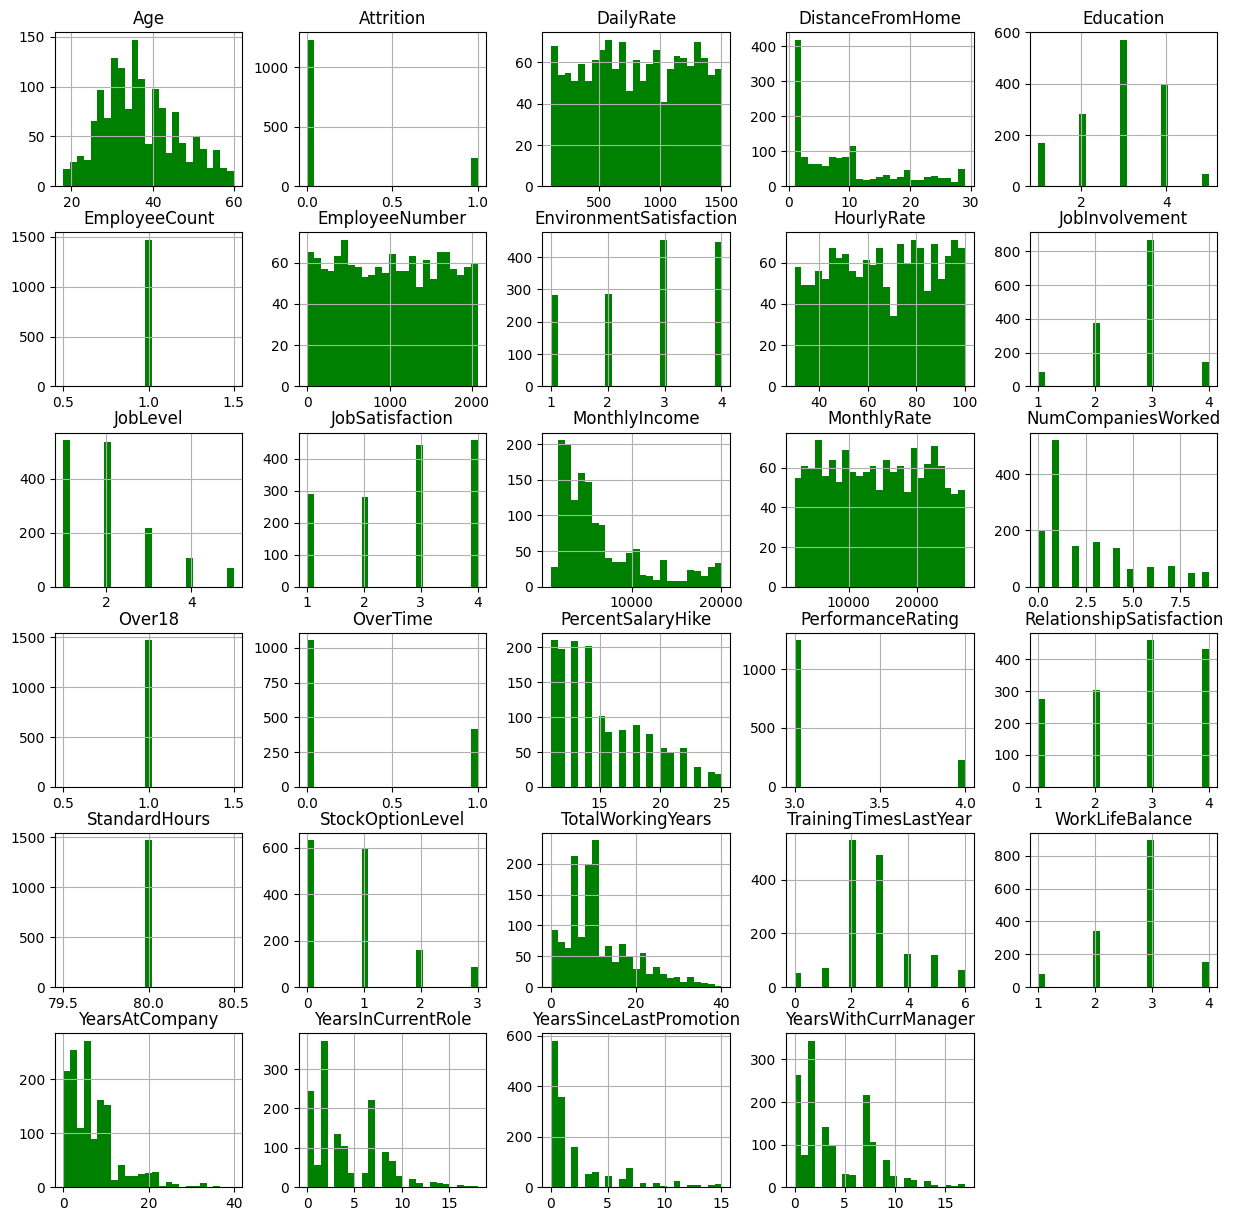

In [14]:
# Several features such as 'MonthlyIncome' and 'TotalWorkingYears' are tail heavy

df.hist(bins=25, figsize=(15,15), color = 'g')
# It makes sense to drop 'EmployeeCount' and 'Standardhours' since they do not change from one employee to the other

In [15]:
df.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'], axis=1, inplace= True)


In [16]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0.0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1.0,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0.0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0.0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [17]:
# It makes sense to drop 'EmployeeCount' , 'Standardhours' and 'Over18' since they do not change from one employee to the other
# Let's drop 'EmployeeNumber' as well


In [18]:
# Let's see how many employees left the company!
people_left  = df[df['Attrition'] == 1.0]
people_staying  = df[df['Attrition'] == 0.0]

In [19]:
len(people_left)

237

In [20]:
# Count the number of employees who stayed and left
# It seems that we are dealing with an imbalanced dataset


In [21]:


#  Let's compare the mean and std of the employees who stayed and left
# 'age': mean age of the employees who stayed is higher compared to who left
# 'DailyRate': Rate of employees who stayed is higher
# 'DistanceFromHome': Employees who stayed live closer to home
# 'EnvironmentSatisfaction' & 'JobSatisfaction': Employees who stayed are generally more satisifed with their jobs
# 'StockOptionLevel': Employees who stayed tend to have higher stock option level

In [22]:
people_staying.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


<Axes: >

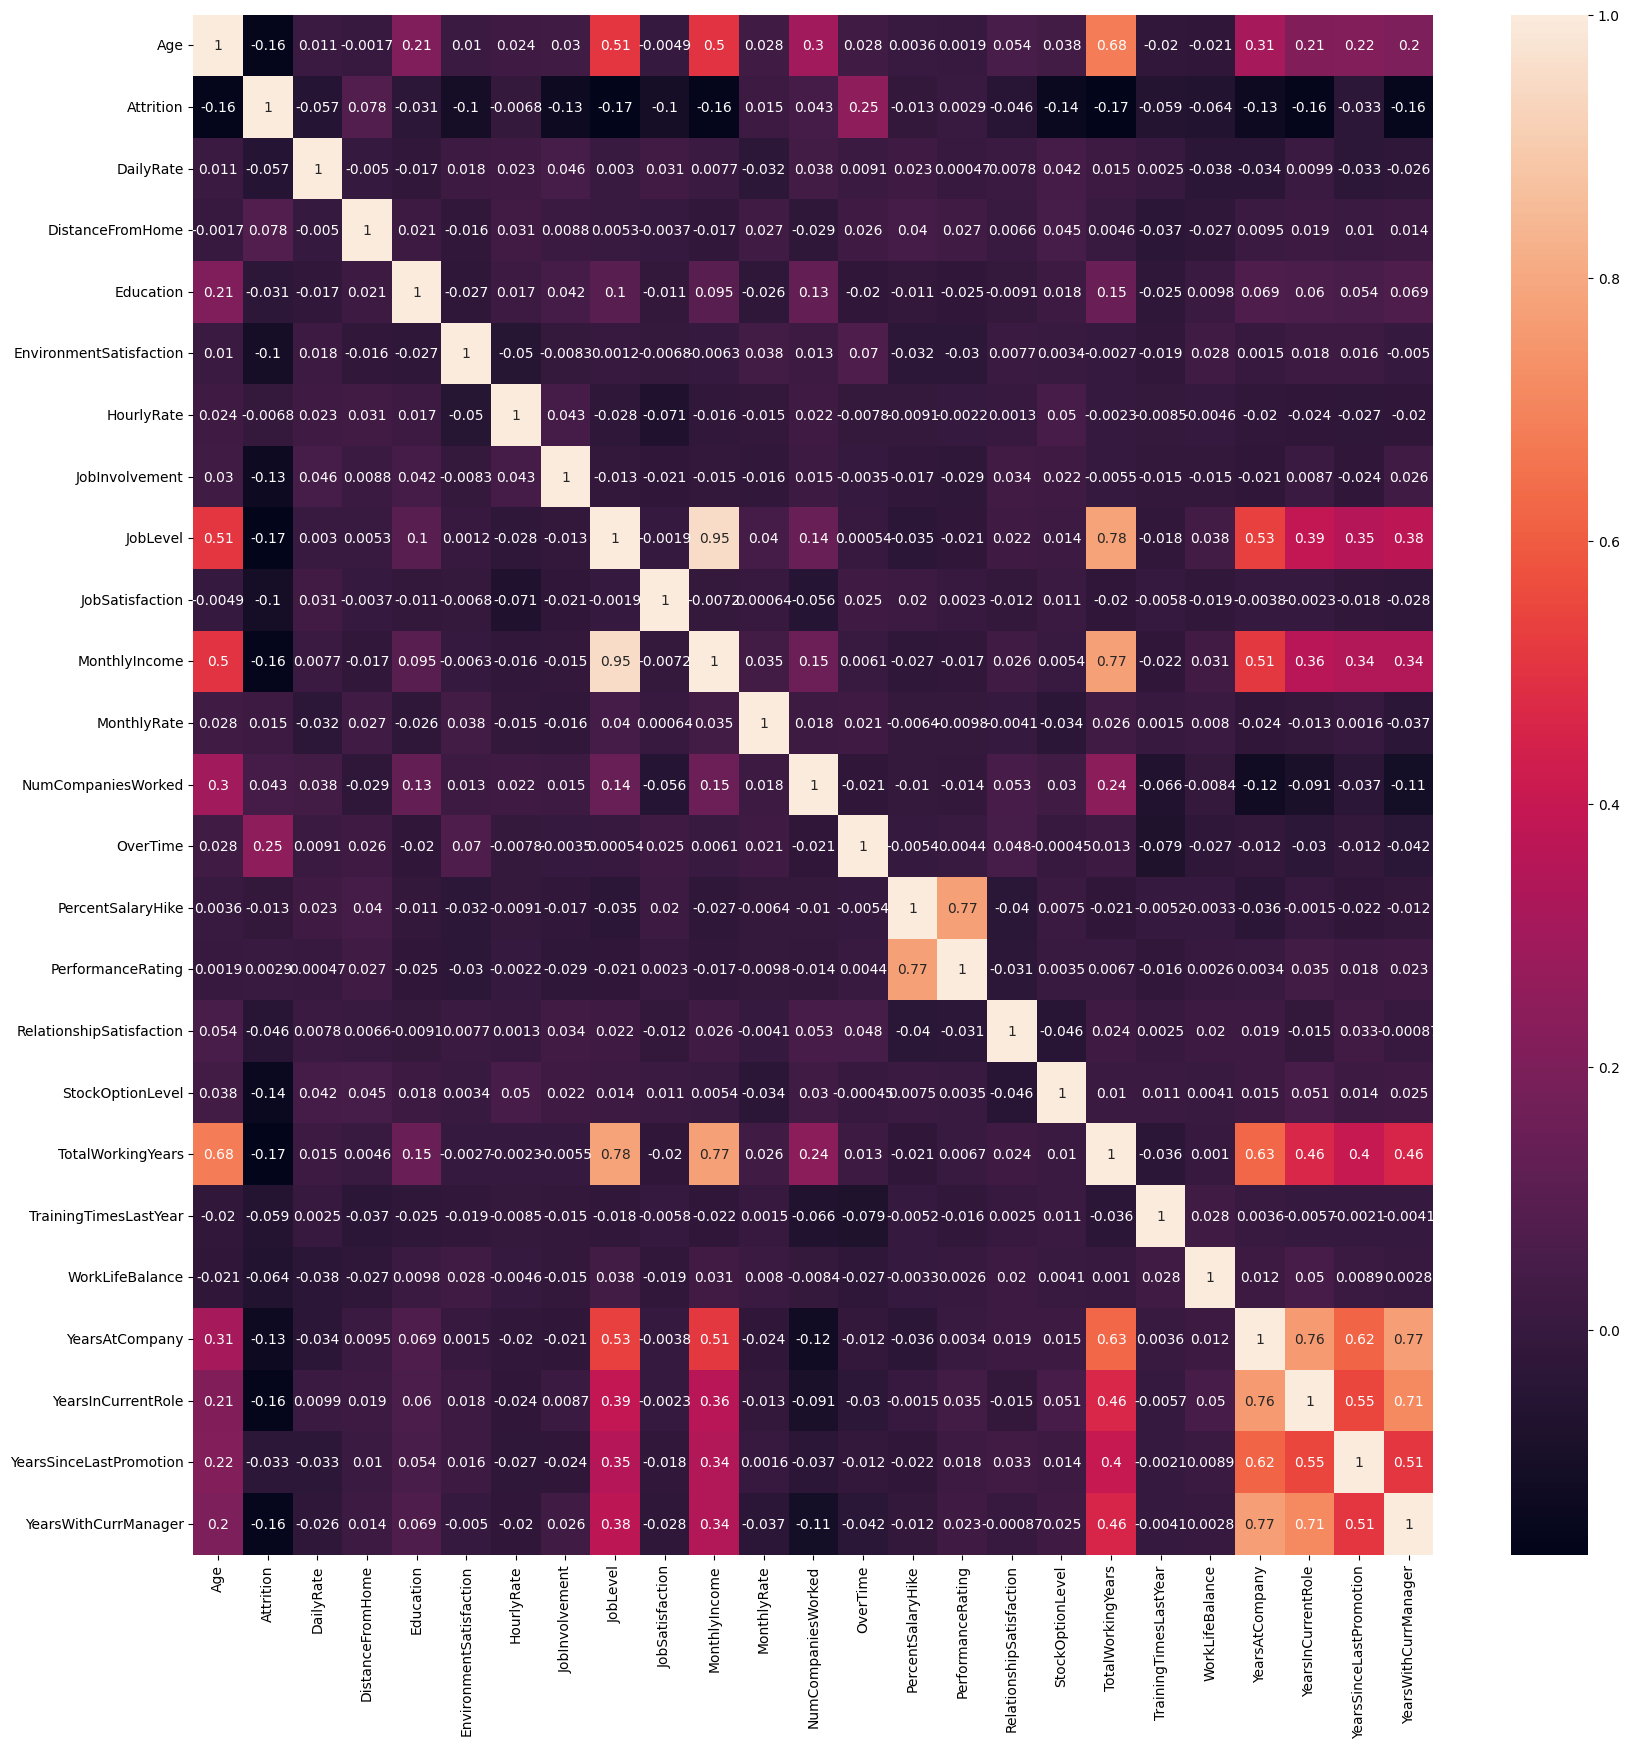

In [23]:
#lets do correlation and find the relation

numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation = numeric_df.corr()
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlation, annot=True)



In [24]:

# Job level is strongly correlated with total working hours
# Monthly income is strongly correlated with Job level
# Monthly income is strongly correlated with total working hours
# Age is stongly correlated with monthly income


<Axes: xlabel='Age', ylabel='count'>

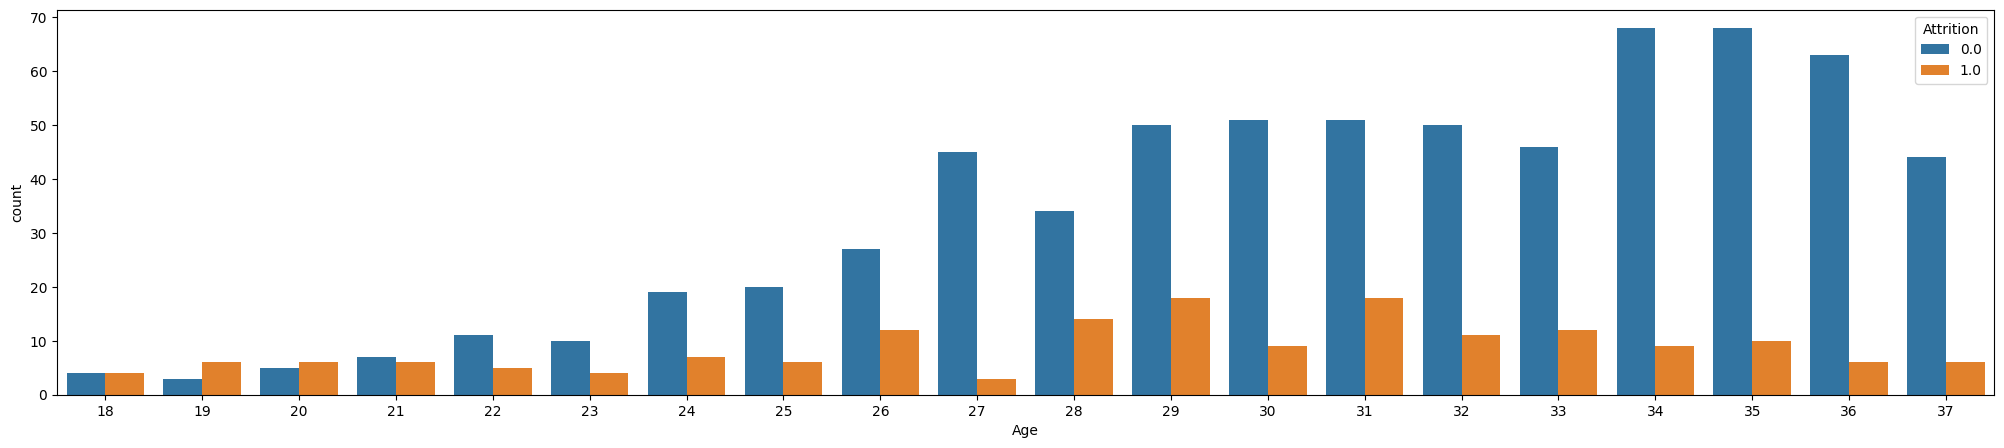

In [25]:
plt.figure(figsize=[25,5])
sns.countplot(x ='Age',hue='Attrition', data = df[df['Age']<=37])

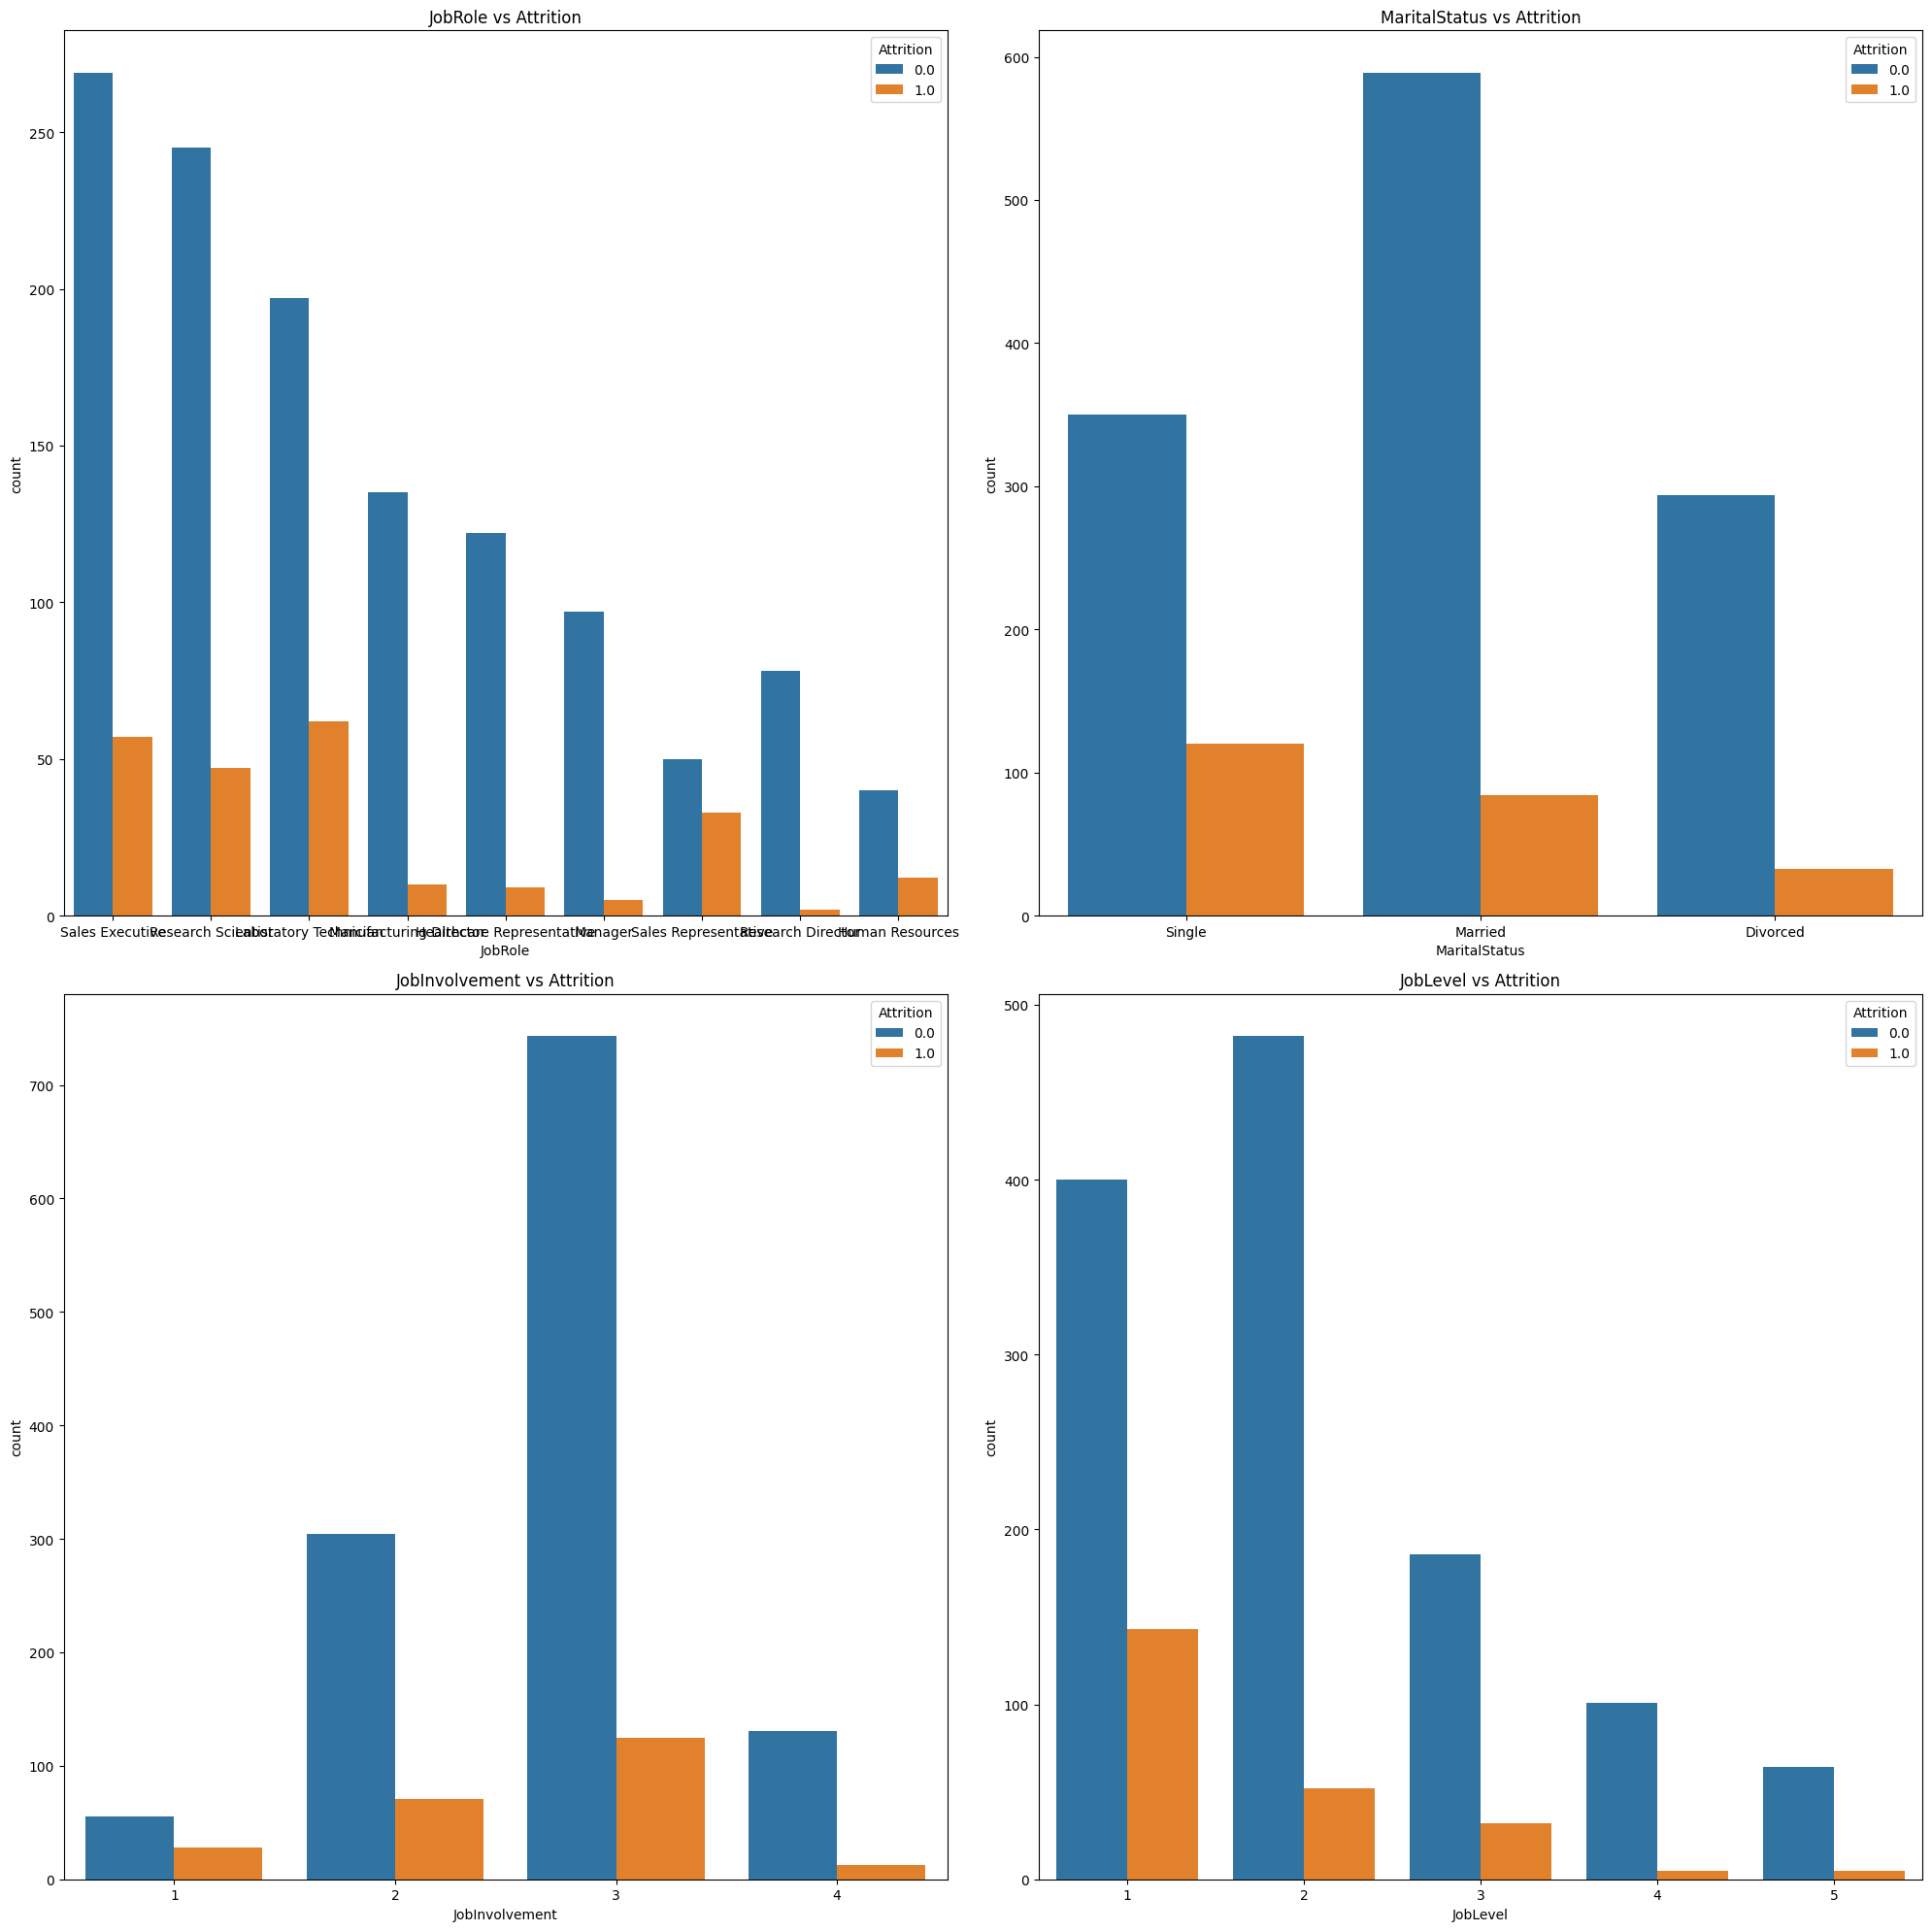

In [42]:

# Create a 2x2 grid of subplots (4 plots in total)
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

# First subplot: JobRole vs Attrition
sns.countplot(x='JobRole', hue='Attrition', data=df, ax=axes[0, 0])
axes[0, 0].set_title('JobRole vs Attrition')

# Second subplot: MaritalStatus vs Attrition
sns.countplot(x='MaritalStatus', hue='Attrition', data=df, ax=axes[0, 1])
axes[0, 1].set_title('MaritalStatus vs Attrition')

# Third subplot: JobInvolvement vs Attrition
sns.countplot(x='JobInvolvement', hue='Attrition', data=df, ax=axes[1, 0])
axes[1, 0].set_title('JobInvolvement vs Attrition')

# Fourth subplot: JobLevel vs Attrition
sns.countplot(x='JobLevel', hue='Attrition', data=df, ax=axes[1, 1])
axes[1, 1].set_title('JobLevel vs Attrition')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()



In [27]:


# Single employees tend to leave compared to married and divorced
# Sales Representitives tend to leave compared to any other job
# Less involved employees tend to leave the company
# Less experienced (low job level) tend to leave the company

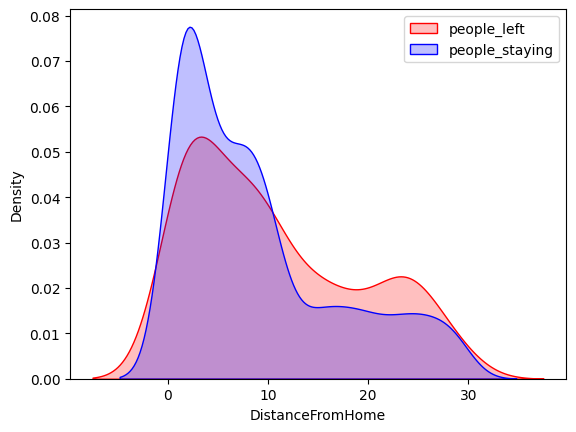

In [57]:
#how about comparing the distance from home to the attirition

sns.kdeplot(people_left['DistanceFromHome'], color='r',fill=True, label='people_left')
sns.kdeplot(people_staying['DistanceFromHome'], color='b', fill=True, label= 'people_staying')
plt.legend(title='')

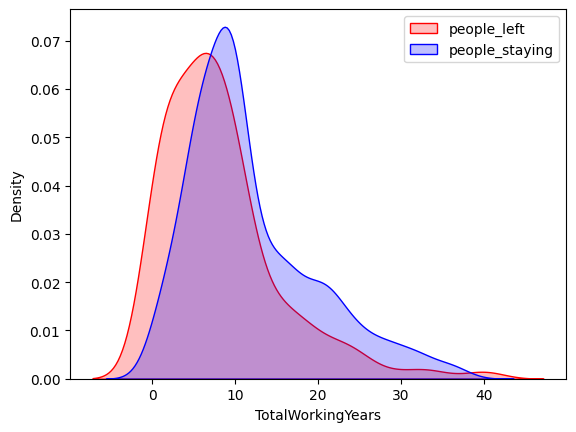

In [59]:
sns.kdeplot(people_left['TotalWorkingYears'], color='r',fill=True, label='people_left')
sns.kdeplot(people_staying['TotalWorkingYears'], color='b', fill=True, label= 'people_staying')
plt.legend(title='')

In [58]:
people_left.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

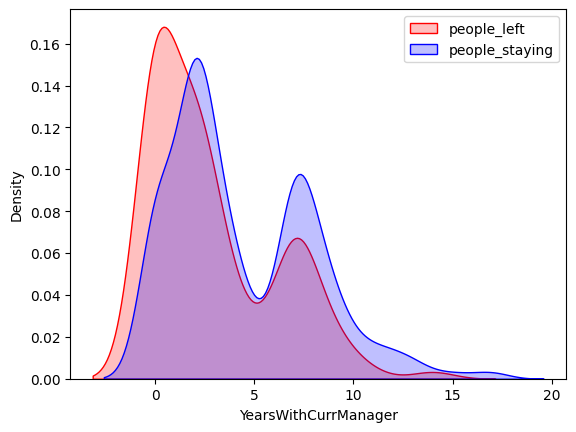

In [60]:

sns.kdeplot(people_left['YearsWithCurrManager'], color='r',fill=True, label='people_left')
sns.kdeplot(people_staying['YearsWithCurrManager'], color='b', fill=True, label= 'people_staying')
plt.legend(title='')

In [28]:
# Let's see the Gender vs. Monthly Income


In [29]:
# Let's see the Gender vs. Monthly Income


# TASK #4: CREATE TESTING AND TRAINING DATASET & PERFORM DATA CLEANING

In [30]:
# note that we dropped the target 'Atrittion'


# TASK #5: UNDERSTAND THE INTUITION BEHIND LOGISTIC REGRESSION CLASSIFIERS, ARTIFICIAL NEURAL NETWORKS, AND RANDOM FOREST CLASSIFIER

![alt text](https://drive.google.com/uc?id=19DpnhFkfsNEDPlH1dkfdr1zO36vRcBit)

![alt text](https://drive.google.com/uc?id=1J03xZf6OiYtGV3IgJBUURBWyScpvaAbU)

![alt text](https://drive.google.com/uc?id=1WNsznVn7je5r9HGnSLLdABICxrIv2Mrs)

![alt text](https://drive.google.com/uc?id=1bX5uGmy5vbYTlp7m4tw_V2kTNzAHpHLp)

![alt text](https://drive.google.com/uc?id=1ztrMNehNYWMw6NwhOOC9BDBdnoNirpqZ)

# TASK #6: UNDERSTAND HOW TO ASSESS CLASSIFICATION MODELS

![alt text](https://drive.google.com/uc?id=1OZLbKm1AJSyvoBgfvlfcLIWZxLOvzOWq)

![alt text](https://drive.google.com/uc?id=11pNdVw4oWeNOWrkadrrxon7FU4qO5m6U)

![alt text](https://drive.google.com/uc?id=1Bk1xFW2tGBdwg-njOhw79MxtYBQnK-6x)

![alt text](https://drive.google.com/uc?id=19cXoBqSiqbEGNofnD603bz3xEAsX28hy)

# TASK #7: TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER

In [31]:
# Testing Set Performance


# TASK #8: TRAIN AND EVALUATE A RANDOM FOREST CLASSIFIER

In [32]:
# Testing Set Performance


# TASK #9: TRAIN AND EVALUATE A DEEP LEARNING MODEL

In [33]:
# oversampler = SMOTE(random_state=0)
# smote_train, smote_target = oversampler.fit_sample(X_train, y_train)
# epochs_hist = model.fit(smote_train, smote_target, epochs = 100, batch_size = 50)


In [34]:
# Testing Set Performance



# EXCELLENT JOB! YOU SHOULD BE PROUD OF YOUR NEWLY ACQUIRED SKILLS